In [2]:
import nest
import numpy as np

In [3]:
neuron = nest.Create('aeif_cond_alpha_multisynapse')
nest.SetStatus(neuron, {"V_peak": 0.0, "a": 4.0, "b":80.5})
nest.SetStatus(neuron, {'E_rev':[0.0, 0.0, 0.0, -85.0],
                        'tau_syn':[1.0, 5.0, 10.0, 8.0]})


In [4]:
spike = nest.Create('spike_generator', params = {'spike_times':
                                                np.array([10.0])})


In [5]:
voltmeter = nest.Create('voltmeter', 1, {'withgid': True})

delays=[1.0, 300.0, 500.0, 700.0]
w=[1.0, 1.0, 1.0, 1.0]

In [6]:
for syn in range(4):
    nest.Connect(spike, neuron, syn_spec={'model': 'static_synapse',
                                          'receptor_type': 1 + syn,
                                          'weight': w[syn],
                                          'delay': delays[syn]})

nest.Connect(voltmeter, neuron)

In [7]:
nest.Simulate(1000.0)
dmm = nest.GetStatus(voltmeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

In [8]:
import pylab

Matplotlib is building the font cache; this may take a moment.


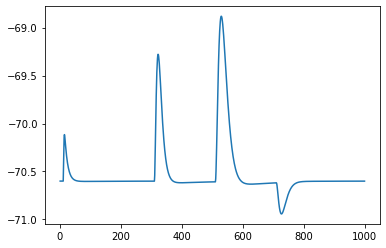

In [9]:
pylab.figure(2)
pylab.plot(ts, Vms)
pylab.show()